In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:


# List all files and directories in the current directory
items = os.listdir('PetImages')
print(items)

['Cat', 'cleaned_data', '.DS_Store', 'Dog']


In [ ]:
from PIL import Image
import imagehash
from tqdm import tqdm

# -------- CONFIG --------
Cat_INPUT_DIR = "PetImages/Cat"
Cat_OUTPUT_DIR = "PetImages/cleaned_data/Cat_cleaned"
Dog_INPUT_DIR = "PetImages/Dog"
Dog_OUTPUT_DIR = "PetImages/cleaned_data/Dog_cleaned"
IMAGE_SIZE = (224, 224)  # Resize target (width, height)
# ------------------------

os.makedirs(Cat_OUTPUT_DIR, exist_ok=True)
os.makedirs(Dog_OUTPUT_DIR, exist_ok=True)

def is_corrupted(image_path):
    try:
        img = Image.open(image_path)
        img.verify()  # Check if corrupted
        return False
    except Exception:
        return True

def hash_image(image_path):
    try:
        img = Image.open(image_path).convert("RGB")
        return imagehash.phash(img)
    except Exception:
        return None

def clean_images(input_dir, output_dir, image_size):
    seen_hashes = set()
    count = 0

    for root, _, files in os.walk(input_dir):
        for fname in tqdm(files, desc="Processing images"):
            fpath = os.path.join(root, fname)

            # Skip non-image files
            if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
                continue

            # Skip corrupted
            if is_corrupted(fpath):
                print(f"⚠️ Corrupted: {fpath}")
                continue

            # Check duplicates
            h = hash_image(fpath)
            if h is None or h in seen_hashes:
                print(f"⚠️ Duplicate: {fpath}")
                continue
            seen_hashes.add(h)

            try:
                # Open, resize, and save
                with Image.open(fpath) as img:
                    img = img.convert("RGB")
                    img = img.resize(image_size, Image.Resampling.LANCZOS)

                    out_path = os.path.join(output_dir, f"{count:06d}.jpg")
                    img.save(out_path, "JPEG")
                    count += 1

            except Exception as e:
                print(f"⚠️ Skipping {fpath}, error: {e}")
                continue

    print(f"✅ Cleaning complete. {count} images saved to {output_dir}")


if __name__ == "__main__":
    clean_images(Cat_INPUT_DIR, Cat_OUTPUT_DIR, IMAGE_SIZE)
    clean_images(Dog_INPUT_DIR, Dog_OUTPUT_DIR, IMAGE_SIZE)


Processing images:  29%|██▉       | 3665/12501 [00:08<00:19, 457.90it/s]

⚠️ Duplicate: PetImages/Cat/12408.jpg


Processing images:  31%|███       | 3895/12501 [00:08<00:20, 425.15it/s]

⚠️ Corrupted: PetImages/Cat/666.jpg


Processing images:  51%|█████     | 6343/12501 [00:14<00:14, 434.25it/s]

⚠️ Duplicate: PetImages/Cat/6442.jpg


Processing images:  57%|█████▋    | 7128/12501 [00:16<00:12, 433.75it/s]

⚠️ Duplicate: PetImages/Cat/10360.jpg


Processing images:  58%|█████▊    | 7309/12501 [00:16<00:11, 446.51it/s]

⚠️ Duplicate: PetImages/Cat/3908.jpg


Processing images:  61%|██████    | 7634/12501 [00:17<00:10, 448.03it/s]

⚠️ Duplicate: PetImages/Cat/1930.jpg


Processing images:  63%|██████▎   | 7913/12501 [00:17<00:10, 454.50it/s]

⚠️ Duplicate: PetImages/Cat/11053.jpg
⚠️ Duplicate: PetImages/Cat/4509.jpg


Processing images:  71%|███████   | 8892/12501 [00:20<00:08, 448.87it/s]

⚠️ Duplicate: PetImages/Cat/4126.jpg
⚠️ Duplicate: PetImages/Cat/2580.jpg


Processing images:  72%|███████▏  | 8982/12501 [00:20<00:07, 444.59it/s]

⚠️ Duplicate: PetImages/Cat/4442.jpg


Processing images:  74%|███████▎  | 9211/12501 [00:20<00:07, 441.43it/s]

⚠️ Duplicate: PetImages/Cat/3112.jpg


Processing images:  76%|███████▌  | 9485/12501 [00:21<00:06, 432.34it/s]

⚠️ Duplicate: PetImages/Cat/3565.jpg


Processing images:  82%|████████▏ | 10304/12501 [00:23<00:04, 443.80it/s]

⚠️ Duplicate: PetImages/Cat/11974.jpg


Processing images:  85%|████████▍ | 10617/12501 [00:24<00:04, 434.64it/s]

⚠️ Duplicate: PetImages/Cat/11197.jpg


Processing images:  89%|████████▉ | 11147/12501 [00:25<00:03, 448.97it/s]

⚠️ Duplicate: PetImages/Cat/6143.jpg


Processing images:  93%|█████████▎| 11643/12501 [00:26<00:01, 443.05it/s]

⚠️ Duplicate: PetImages/Cat/1639.jpg


Processing images:  97%|█████████▋| 12134/12501 [00:27<00:00, 445.88it/s]

⚠️ Duplicate: PetImages/Cat/4435.jpg


Processing images:  99%|█████████▉| 12363/12501 [00:28<00:00, 453.35it/s]

⚠️ Duplicate: PetImages/Cat/4795.jpg
⚠️ Duplicate: PetImages/Cat/11595.jpg


Processing images: 100%|██████████| 12501/12501 [00:28<00:00, 441.22it/s]


✅ Cleaning complete. 12480 images saved to PetImages/cleaned_data/Cat_cleaned


Processing images:   0%|          | 0/12501 [00:00<?, ?it/s]/Users/amitpatel/Developer/PythonFiles/Image-Classification-Cat-v-Dog/.venv/lib/python3.13/site-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
Processing images:  38%|███▊      | 4799/12501 [00:11<00:17, 432.07it/s]

⚠️ Duplicate: PetImages/Dog/9746.jpg


Processing images:  50%|█████     | 6312/12501 [00:14<00:14, 439.60it/s]

⚠️ Duplicate: PetImages/Dog/10.jpg
⚠️ Corrupted: PetImages/Dog/11702.jpg


Processing images:  51%|█████     | 6400/12501 [00:14<00:14, 429.62it/s]

⚠️ Duplicate: PetImages/Dog/9956.jpg


Processing images:  60%|██████    | 7546/12501 [00:17<00:11, 428.41it/s]

⚠️ Duplicate: PetImages/Dog/1273.jpg


Processing images:  68%|██████▊   | 8473/12501 [00:19<00:09, 436.76it/s]

⚠️ Duplicate: PetImages/Dog/8044.jpg


Processing images:  72%|███████▏  | 9006/12501 [00:21<00:08, 426.53it/s]

⚠️ Duplicate: PetImages/Dog/2027.jpg


Processing images:  75%|███████▌  | 9414/12501 [00:21<00:06, 444.77it/s]

⚠️ Duplicate: PetImages/Dog/10401.jpg
⚠️ Duplicate: PetImages/Dog/6421.jpg
⚠️ Duplicate: PetImages/Dog/180.jpg


Processing images:  82%|████████▏ | 10302/12501 [00:24<00:05, 437.31it/s]

⚠️ Duplicate: PetImages/Dog/2877.jpg


Processing images:  83%|████████▎ | 10434/12501 [00:24<00:04, 424.94it/s]

⚠️ Duplicate: PetImages/Dog/6026.jpg


Processing images:  85%|████████▍ | 10608/12501 [00:24<00:04, 425.50it/s]

⚠️ Duplicate: PetImages/Dog/8591.jpg


Processing images:  86%|████████▌ | 10740/12501 [00:25<00:04, 427.99it/s]

⚠️ Duplicate: PetImages/Dog/1947.jpg


Processing images:  90%|█████████ | 11272/12501 [00:26<00:02, 427.00it/s]

⚠️ Duplicate: PetImages/Dog/3832.jpg


Processing images: 100%|██████████| 12501/12501 [00:29<00:00, 427.09it/s]

⚠️ Duplicate: PetImages/Dog/6357.jpg
✅ Cleaning complete. 12484 images saved to PetImages/cleaned_data/Dog_cleaned


In [6]:


# Paths
directory = "PetImages/cleaned_data"
train_dir = os.path.join(directory, "train")
val_dir = os.path.join(directory, "val")

# Parameters
IMAGE_SIZE = 150
BATCH_SIZE = 32

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use the same directory, split inside the generator
)

# Rescaling ONLY for Validation/Test data
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="training",  # tells generator to use training split
    seed=42
)

# Validation data generator
validation_generator = validation_datagen.flow_from_directory(
    directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="validation",  # tells generator to use validation split
    seed=42
)


Found 19972 images belonging to 2 classes.
Found 4992 images belonging to 2 classes.


In [8]:
model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Block 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.4), # Stronger regularization

    # Block 4
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5), # Increased regularization

    # Flattening
    Flatten(),

    # Dense Layers
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5), # Heaviest regularization before output

    # Output Layer
    Dense(1, activation='sigmoid') # Binary classification
])


/Users/amitpatel/Developer/PythonFiles/Image-Classification-Cat-v-Dog/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001), # Changed 'lr' to 'learning_rate'
              metrics=['acc'])

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce LR on Plateau: Halve the learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)

# --- 7. Train the Model ---

EPOCHS = 50

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


/Users/amitpatel/Developer/PythonFiles/Image-Classification-Cat-v-Dog/.venv/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


624/624 ━━━━━━━━━━━━━━━━━━━━ 408s 652ms/step - acc: 0.5819 - loss: 0.7652 - val_acc: 0.5903 - val_loss: 0.6888 - learning_rate: 0.0010
Epoch 2/50
  1/624 ━━━━━━━━━━━━━━━━━━━━ 7:26 716ms/step - acc: 0.5312 - loss: 0.6886

/Users/amitpatel/Developer/PythonFiles/Image-Classification-Cat-v-Dog/.venv/lib/python3.13/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - acc: 0.5312 - loss: 0.6886 - val_acc: 0.5931 - val_loss: 0.6804 - learning_rate: 0.0010
Epoch 3/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 468s 750ms/step - acc: 0.6612 - loss: 0.6338 - val_acc: 0.6685 - val_loss: 0.6110 - learning_rate: 0.0010
Epoch 4/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - acc: 0.6250 - loss: 0.7145 - val_acc: 0.6585 - val_loss: 0.6232 - learning_rate: 0.0010
Epoch 5/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 453s 726ms/step - acc: 0.7006 - loss: 0.5835 - val_acc: 0.7520 - val_loss: 0.5230 - learning_rate: 0.0010
Epoch 6/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - acc: 0.7188 - loss: 0.6499 - val_acc: 0.7652 - val_loss: 0.5106 - learning_rate: 0.0010
Epoch 7/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 468s 749ms/step - acc: 0.7358 - loss: 0.5360 - val_acc: 0.7181 - val_loss: 0.5623 - learning_rate: 0.0010
Epoch 8/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - acc: 0.6875 - loss: 0.5073 - val_acc: 0.7069 - val_loss: 0.5814 - learning_rate: 0.00

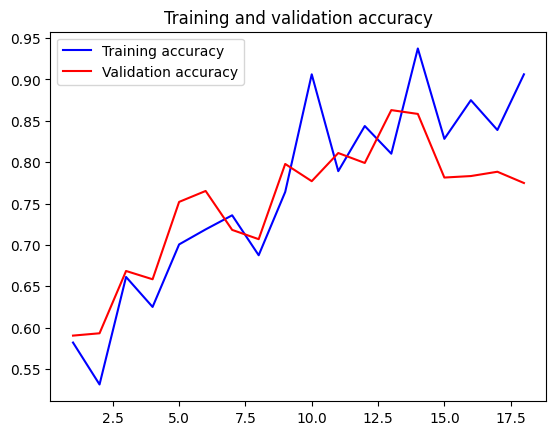

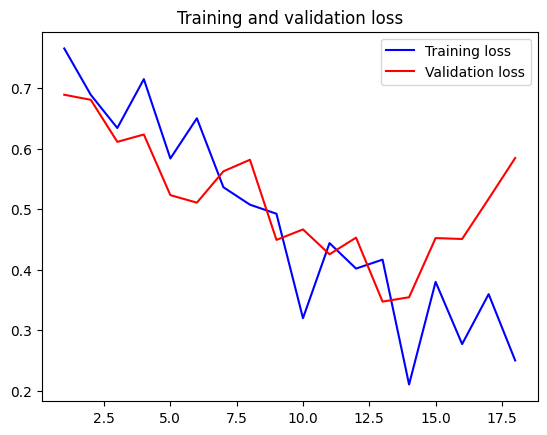

In [13]:
import matplotlib.pyplot as plt
acc = history.history.get('accuracy', history.history.get('acc'))
val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

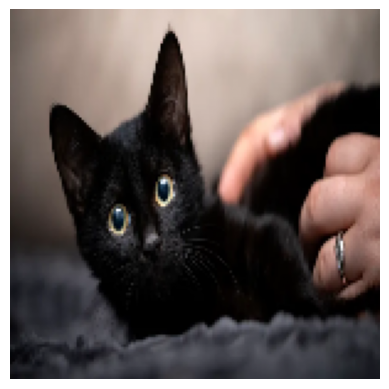

In [3]:
import cv2
test_image_path = "cat1.webp"  # Replace with your test image path

img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB
img = cv2.resize(img, (150, 150))           # or (256, 256), must match training
img = img / 255.0                           # Normalize
img = tf.expand_dims(img, axis=0)           # Shape: (1, h, w, 3)

plt.imshow(tf.squeeze(img))
plt.axis('off')
plt.show()

In [5]:
pred = model.predict(img)
score = pred[0][0]

if score < 0.5:
    label = "Cat"
else:
    label = "Dog"

print(f"Predicted class: {label}")

NameError: name 'model' is not defined

In [ ]:
model.save('cat_dog_cnn_91_accuracy.h5')
print("\nModel saved as 'cat_dog_cnn_91_accuracy.h5'")


Model saved as 'cat_dog_cnn_95_accuracy.h5'
